In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("E:/AII/AII_Course-1-main/Classification/titanic_survivors/data/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [5]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [6]:
data["Sspc"] = data["SibSp"]+ data["Parch"]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sspc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
drop_col = ['Cabin', 'Name','PassengerId','Ticket','SibSp','Parch']
data = data.drop (drop_col, axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Sspc
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [9]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Sspc
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [10]:
y= data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
X = data.drop(['Survived'], axis=1)
X

,Pclass,Sex,Age,Fare,Embarked,Sspc
0,3,1,22.000000,7.2500,2,1
1,1,0,38.000000,71.2833,0,1
2,3,0,26.000000,7.9250,2,0
3,1,0,35.000000,53.1000,2,1
4,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...
886,2,1,27.000000,13.0000,2,0
887,1,0,19.000000,30.0000,2,0
888,3,0,29.699118,23.4500,2,3
889,1,1,26.000000,30.0000,0,0


In [12]:
#clustering

from sklearn.cluster import KMeans                   # K-Means Clustering
from sklearn.cluster import AgglomerativeClustering  # Hierarchical Clustering
from sklearn.cluster import DBSCAN                   # DBSCAN Clustering

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [13]:
n_clusters=len(np.unique(y))
n_clusters

2

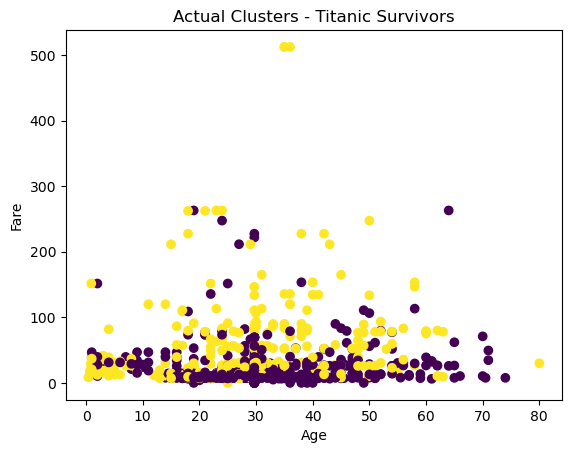

In [14]:
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y, cmap='viridis')
plt.title(f'Actual Clusters - Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [15]:
#k means clustering

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

E:\AnacondaFile\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\AnacondaFile\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [16]:
# Evaluating the clustering model

silhouette_kmeans = silhouette_score(X, labels_kmeans)
print(silhouette_kmeans)

0.6614759857022078


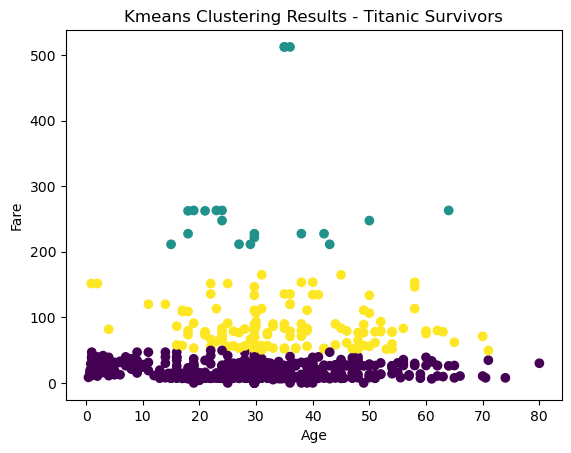

In [17]:
# Plotting the cluster
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=labels_kmeans, cmap='viridis')
plt.title(f'Kmeans Clustering Results - Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [18]:
# Hierarchical Clustering

agg = AgglomerativeClustering(n_clusters=2)

agg.fit(X)
labels_agg = agg.labels_

In [19]:
# Evaluate the clustering model
silhouette_agg = silhouette_score(X, labels_agg)
print(silhouette_agg)

0.8464886813174314


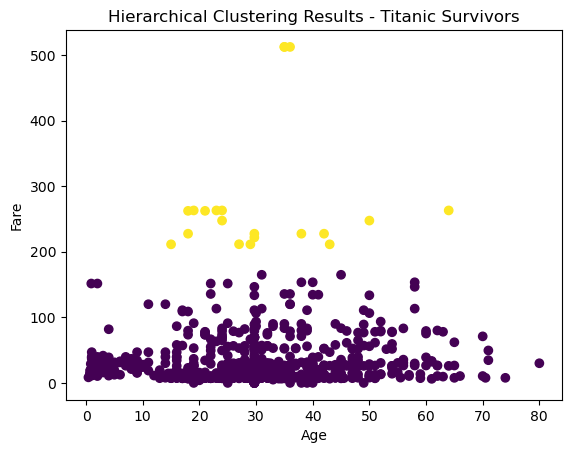

In [20]:
# Plot the clusters
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=labels_agg, cmap='viridis')
plt.title(f'Hierarchical Clustering Results - Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [21]:
# DBSCAN Clustering

dbscan = DBSCAN(eps=0.6, min_samples=10)

dbscan.fit(X)
labels_dbscan = dbscan.labels_

In [22]:
# Evaluate the clustering model

silhouette_dbscan = silhouette_score(X, labels_dbscan)
print(silhouette_dbscan)

-0.32316210854320127


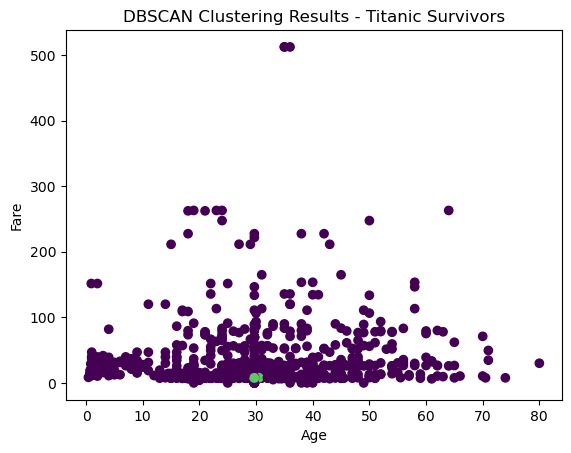

In [23]:
# Plot the clusters

plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=labels_dbscan, cmap='viridis')
plt.title(f'DBSCAN Clustering Results - Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [24]:
# Evaluate the clustering model
silhouette_kmeans = silhouette_score(X, labels_kmeans)
silhouette_agg = silhouette_score(X, labels_agg)
silhouette_dbscan = silhouette_score(X, labels_dbscan)

print (silhouette_kmeans)
print (silhouette_agg)
print (silhouette_dbscan)

0.6614759857022078
0.8464886813174314
-0.32316210854320127


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X) 
X = pd.DataFrame(scaled_data, columns=['Pclass','Sex','Age','Fare','Embarked','Sspc'])


In [26]:
#Test train data set splitting

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

In [28]:
# Define the models for evaluation

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=10000)),
]

In [29]:
# Evaluate each model using cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: Accuracy = {scores.mean()}, Standard Deviation = {scores.std()}")

Logistic Regression: Accuracy = 0.8053606065949568, Standard Deviation = 0.053035671054597416
Decision Tree: Accuracy = 0.7827719978839711, Standard Deviation = 0.010859533347299727
Random Forest: Accuracy = 0.8128196085346499, Standard Deviation = 0.027912784072047836
Naive Bayes: Accuracy = 0.7922588608710985, Standard Deviation = 0.06125286463726132
Neural Network: Accuracy = 0.8221654029271732, Standard Deviation = 0.041979981933301394


In [30]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [31]:
# Define the model
model = svm.SVC()

In [32]:
#Hyper-parameter of SVC 

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [33]:
# Getting the accuracy scores for each combination

results = grid_search.cv_results_
combinations = results['params']
accuracies = results['mean_test_score']

# Printing the accuracy for each combination

for combination, accuracy in zip(combinations, accuracies):
    print(combination, "Accuracy:", accuracy)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} Accuracy: 0.7959619114794568
{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'} Accuracy: 0.7397108093810616
{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'} Accuracy: 0.8071944983248105
{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'} Accuracy: 0.7903368012696174
{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'} Accuracy: 0.7959619114794568
{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'} Accuracy: 0.7415976018338917
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} Accuracy: 0.8071944983248105
{'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'} Accuracy: 0.786598483512608
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'} Accuracy: 0.7940927526009522
{'C': 1, 'gamma': 'scale', 'kernel': 'poly'} Accuracy: 0.8221654029271732
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} Accuracy: 0.8333803561982014
{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'} Accuracy: 0.7154117439605008
{'C': 1, 'gamma': 'auto', 'kernel': 'linear'} Accuracy: 0.7940927526009522
{'C': 1, 'gamm

In [34]:
# Printing the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Hyperparameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy:  0.8011204481792717
